# *E. coli* iJO1366 Model Attributes

Set the environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
from cobrapy_bigg_client import client
from cobra.flux_analysis import production_envelope

pd.set_option('display.max_rows', 1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)

Load the *E.coli* core model "iJO1366.json"

In [2]:
model = client.download_model('iJO1366', save=False) # Loading the model to the simulation

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


## 1. Model Attribute Summary

In [3]:
model

<Model iJO1366 at 0x2b4e2b5b040>

## 2. Biomass Functions

Find the biomass functions available in the model

In [4]:
for reaction in model.reactions.query('biomass', 'name'):
    print(reaction.name)

E. coli biomass objective function (iJO1366) - WT - with 53.95 GAM estimate
E. coli biomass objective function (iJO1366) - core - with 53.95 GAM estimate


Properties of the core biomass function

In [5]:
model.reactions.BIOMASS_Ec_iJO1366_core_53p95M

<Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x2b48863a2b0>

Properties of the wild type biomass function

In [6]:
model.reactions.BIOMASS_Ec_iJO1366_WT_53p95M

<Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x2b4886032b0>

These biomass functions will be discussed more in "iJO1366_Biomass_Functions.ipynb"

## 3. Default Objective Function

Identify the default objective function

In [7]:
print('Objective expression: ', model.objective.expression)
print('Objective direction (max/min): ',model.objective.direction)

Objective expression:  1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Objective direction (max/min):  max


Note that the objective function ia optimizing biomass growth!

## Robustness Analysis

Let's explore the impact of oxygen on the model through robustness analysis

In [8]:
model.reactions.EX_o2_e.bounds = [-30, 0] # Setting realistic boundarys
RA_o2 = production_envelope(
    model, ["EX_o2_e"], objective="BIOMASS_Ec_iJO1366_core_53p95M", carbon_sources="EX_glc__D_e", points=100)
RA_o2.round(5)

carbon_source  flux_minimum  carbon_yield_minimum  mass_yield_minimum  flux_maximum  carbon_yield_maximum  mass_yield_maximum   EX_o2_e
0    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -30.00000
1    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -29.69697
2    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -29.39394
3    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -29.09091
4    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -28.78788
5    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -28.48485
6    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -28.18182
7    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -27.87879
8    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -27.57576
9    EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -27.27273
10   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -26.96970
11   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -26.66667
12   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -26.36364
13   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -26.06061
14   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -25.75758
15   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -25.45455
16   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -25.15152
17   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -24.84848
18   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -24.54545
19   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -24.24242
20   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -23.93939
21   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -23.63636
22   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -23.33333
23   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -23.03030
24   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -22.72727
25   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -22.42424
26   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516                 NaN -22.12121
27   EX_glc__D_e           0.0                   0.0                 NaN       0.98237               9.50516   

Plotting the results

<AxesSubplot:xlabel='EX_o2_e'>

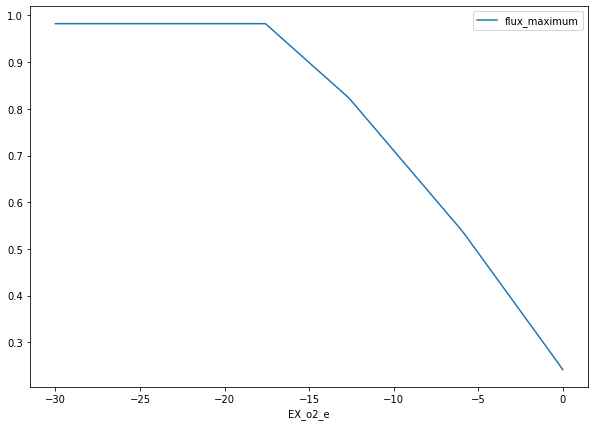

In [9]:
RA_o2.plot(kind='line', x='EX_o2_e', y='flux_maximum',figsize=(10,7))

Note that after an uptake of ~18 the growth is constant (reduced cost is zero)

Looking at the robustness analysis for glucose uptake

In [10]:
model.reactions.EX_glc__D_e.bounds = [-30,0] # Expanding the glucose uptake range
RA_glc = production_envelope(
    model, ["EX_glc__D_e"], objective="BIOMASS_Ec_iJO1366_core_53p95M", 
    carbon_sources="EX_glc__D_e", points=100)
RA_glc.round(5)

carbon_source  flux_minimum  carbon_yield_minimum  mass_yield_minimum  flux_maximum  carbon_yield_maximum  mass_yield_maximum  EX_glc__D_e
0    EX_glc__D_e           0.0                   0.0                 NaN       2.19960               7.09426                 NaN    -30.00000
1    EX_glc__D_e           0.0                   0.0                 NaN       2.18998               7.13497                 NaN    -29.69832
2    EX_glc__D_e           0.0                   0.0                 NaN       2.18036               7.17651                 NaN    -29.39665
3    EX_glc__D_e           0.0                   0.0                 NaN       2.17073               7.21892                 NaN    -29.09497
4    EX_glc__D_e           0.0                   0.0                 NaN       2.16111               7.26221                 NaN    -28.79329
5    EX_glc__D_e           0.0                   0.0                 NaN       2.15149               7.30642                 NaN    -28.49162
6    EX_glc__D_e           0.0                   0.0                 NaN       2.14186               7.35158                 NaN    -28.18994
7    EX_glc__D_e           0.0                   0.0                 NaN       2.13224               7.39771                 NaN    -27.88827
8    EX_glc__D_e           0.0                   0.0                 NaN       2.12261               7.44486                 NaN    -27.58659
9    EX_glc__D_e           0.0                   0.0                 NaN       2.11299               7.49304                 NaN    -27.28491
10   EX_glc__D_e           0.0                   0.0                 NaN       2.10337               7.54231                 NaN    -26.98324
11   EX_glc__D_e           0.0                   0.0                 NaN       2.09374               7.59268                 NaN    -26.68156
12   EX_glc__D_e           0.0                   0.0                 NaN       2.08412               7.64421                 NaN    -26.37988
13   EX_glc__D_e           0.0                   0.0                 NaN       2.07449               7.69694                 NaN    -26.07821
14   EX_glc__D_e           0.0                   0.0                 NaN       2.06487               7.75089                 NaN    -25.77653
15   EX_glc__D_e           0.0                   0.0                 NaN       2.05525               7.80613                 NaN    -25.47485
16   EX_glc__D_e           0.0                   0.0                 NaN       2.04562               7.86268                 NaN    -25.17318
17   EX_glc__D_e           0.0                   0.0                 NaN       2.03600               7.92061                 NaN    -24.87150
18   EX_glc__D_e           0.0                   0.0                 NaN       2.02637               7.97997                 NaN    -24.56983
19   EX_glc__D_e           0.0                   0.0                 NaN       2.01675               8.04079                 NaN    -24.26815
20   EX_glc__D_e           0.0                   0.0                 NaN       2.00667               8.10131                 NaN    -23.96647
21   EX_glc__D_e           0.0                   0.0                 NaN       1.99338               8.15025                 NaN    -23.66480
22   EX_glc__D_e           0.0                   0.0                 NaN       1.97991               8.19969                 NaN    -23.36312
23   EX_glc__D_e           0.0                   0.0                 NaN       1.96643               8.25042                 NaN    -23.06144
24   EX_glc__D_e           0.0                   0.0                 NaN       1.95296               8.30250                 NaN    -22.75977
25   EX_glc__D_e           0.0                   0.0                 NaN       1.93948               8.35597                 NaN    -22.45809
26   EX_glc__D_e           0.0                   0.0                 NaN       1.92601               8.41090                 NaN    -22.15642
27   EX_glc__D_e           

Plotting the results

<AxesSubplot:xlabel='EX_glc__D_e'>

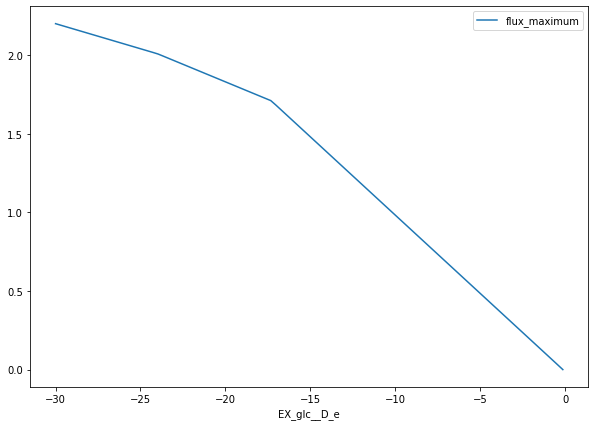

In [11]:
RA_glc.plot(kind='line', x='EX_glc__D_e', y='flux_maximum',figsize=(10,7))

Note that the growth rate does not increase linearly. The kinks in the graph represent different phenotypes.

## Compartments

In [12]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

## Subsystems

In [13]:
model = client.download_model('iJO1366', save=False) # Loading the model to the simulation
reaction_subsystem = [r.subsystem for r in model.reactions]
subsystem = pd.DataFrame(reaction_subsystem, columns = ['iJO1366 Subsystems'])
subsystem = subsystem.drop_duplicates()
subsystem = subsystem.reset_index(drop=True)
subsystem

iJO1366 Subsystems
0                               Extracellular exchange
1                                 Intracellular demand
2                    Biomass and maintenance functions
3                            Transport, Inner Membrane
4                      Transport, Outer Membrane Porin
5                            Transport, Outer Membrane
6                           Nucleotide Salvage Pathway
7                       Glycerophospholipid Metabolism
8                          Alternate Carbon Metabolism
9           Cofactor and Prosthetic Group Biosynthesis
10                          Cell Envelope Biosynthesis
11                            Methylglyoxal Metabolism
12                     Arginine and Proline Metabolism
13                           Membrane Lipid Metabolism
14                                 Pyruvate Metabolism
15  Tyrosine, Tryptophan, and Phenylalanine Metabolism
16                                    Murein Recycling
17          Valine, Leucine, and Isoleucine Metabolism
18                                 Nitrogen Metabolism
19         Lipopolysaccharide Biosynthesis / Recycling
20                                          Unassigned
21                                   Citric Acid Cycle
22              Inorganic Ion Transport and Metabolism
23                               Methionine Metabolism
24                  Purine and Pyrimidine Biosynthesis
25                    Alanine and Aspartate Metabolism
26                                       tRNA Charging
27                                 Cysteine Metabolism
28                     Threonine and Lysine Metabolism
29                                Histidine Metabolism
30                           Oxidative Phosphorylation
31                       Glycine and Serine Metabolism
32                           Pentose Phosphate Pathway
33                          Glycolysis/Gluconeogenesis
34                                   Folate Metabolism
35                                Glutamate Metabolism
36                               Glyoxylate Metabolism
37                               Anaplerotic Reactions
38                                 Murein Biosynthesis

## Reactions

In [14]:
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_LB = [r.lower_bound for r in model.reactions]
reaction_UB = [r.upper_bound for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Lower Bound': reaction_LB,
                'Reaction Upper Bound': reaction_UB,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                          'Reaction Lower Bound','Reaction Upper Bound','Reaction Subsystem'])
pd.set_option('display.max_rows', 500)
df

Reaction ID                                              Reaction Name                                               Reaction Formula  Reaction Lower Bound  Reaction Upper Bound          Reaction Subsystem
0          EX_cm_e                                   Chloramphenicol exchange                                                      cm_e -->                    0.0                1000.0      Extracellular exchange
1         EX_cmp_e                                               CMP exchange                                                     cmp_e -->                    0.0                1000.0      Extracellular exchange
2         EX_co2_e                                               CO2 exchange                                                     co2_e <=>                -1000.0                1000.0      Extracellular exchange
3     EX_cobalt2_e                                              Co2+ exchange                                                 cobalt2_e <=>                -1000.0                1000.0      Extracellular exchange
4      DM_4crsol_c              Sink needed to allow p-Cresol to leave system                                                  4crsol_c -->                    0.0                1000.0        Intracellular demand
...            ...                                                        ...                                                            ...                   ...                   ...                         ...
2578         RNDR4                 Ribonucleoside-diphosphate reductase (UDP)                   trdrd_c + udp_c --> dudp_c + h2o_c + trdox_c                   0.0                1000.0  Nucleotide Salvage Pathway
2579        RNDR4b  Ribonucleoside-diphosphate reductase (UDP) (glutaredoxin)                   grxrd_c + udp_c --> dudp_c + grxox_c + h2o_c                   0.0                1000.0  Nucleotide Salvage Pathway
2580       RNTR1c2   Ribonucleoside-triphosphate reductase (ATP) (flavodoxin)  atp_c + 2.0 flxr_c + 2.0 h_c --> datp_c + 2.0 flxso_c + h2o_c                   0.0                1000.0  Nucleotide Salvage Pathway
2581       RNTR2c2   Ribonucleoside-triphosphate reductase (GTP) (flavodoxin)  2.0 flxr_c + gtp_c + 2.0 h_c --> dgtp_c + 2.0 flxso_c + h2o_c                   0.0                1000.0  Nucleotide Salvage Pathway
2582       RNTR3c2   Ribonucleoside-triphosphate reductase (CTP) (flavodoxin)  ctp_c + 2.0 flxr_c + 2.0 h_c --> dctp_c + 2.0 flxso_c + h2o_c                   0.0                1000.0  Nucleotide Salvage Pathway

[2583 rows x 6 columns]

### Boundary Reactions
Looking at the boundary reactions. First, the **exchange reactions**.

In [15]:
model.exchanges

[<Reaction EX_cm_e at 0x2b48e107dc0>,
 <Reaction EX_cmp_e at 0x2b48e107e20>,
 <Reaction EX_co2_e at 0x2b48e107e80>,
 <Reaction EX_cobalt2_e at 0x2b48e107f40>,
 <Reaction EX_colipa_e at 0x2b48e115400>,
 <Reaction EX_glc__D_e at 0x2b48e115580>,
 <Reaction EX_glcn_e at 0x2b48e115640>,
 <Reaction EX_glcr_e at 0x2b48e1157c0>,
 <Reaction EX_colipap_e at 0x2b48e115100>,
 <Reaction EX_glcur_e at 0x2b48e115880>,
 <Reaction EX_glcur1p_e at 0x2b48e1151c0>,
 <Reaction EX_12ppd__R_e at 0x2b48e147790>,
 <Reaction EX_gln__L_e at 0x2b48e147550>,
 <Reaction EX_cpgn_e at 0x2b48e147850>,
 <Reaction EX_glu__L_e at 0x2b48e147610>,
 <Reaction EX_gly_e at 0x2b48e16d340>,
 <Reaction EX_glyald_e at 0x2b48e16d400>,
 <Reaction EX_glyb_e at 0x2b48e16d4c0>,
 <Reaction EX_glyc_e at 0x2b48e16d580>,
 <Reaction EX_12ppd__S_e at 0x2b48e16d640>,
 <Reaction EX_14glucan_e at 0x2b48e16d700>,
 <Reaction EX_cpgn_un_e at 0x2b48e16d7c0>,
 <Reaction EX_15dap_e at 0x2b48e16d880>,
 <Reaction EX_glyc__R_e at 0x2b48e16d940>,
 <Reac

A table showing the properties of the exchange reactions.

In [16]:
exchange_ids = [r.id for r in model.exchanges]
exchange_names = [r.name for r in model.exchanges]
exchange_formula = [r.reaction for r in model.exchanges]
exchange_lb = [r.lower_bound for r in model.exchanges]
exchange_ub = [r.upper_bound for r in model.exchanges]
exchangeList = {'Reaction ID': exchange_ids,
                'Reaction Name': exchange_names,
                'Reaction Formula': exchange_formula,
                'Reaction Lower Bound': exchange_lb,
                'Reaction Upper Bound': exchange_ub,
               }
exchange_df = pd.DataFrame(exchangeList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
exchange_df

Reaction ID                                                               Reaction Name         Reaction Formula  Reaction Lower Bound  Reaction Upper Bound
0                  EX_cm_e                                                    Chloramphenicol exchange                cm_e -->                   0.00                1000.0
1                 EX_cmp_e                                                                CMP exchange               cmp_e -->                   0.00                1000.0
2                 EX_co2_e                                                                CO2 exchange               co2_e <=>               -1000.00                1000.0
3             EX_cobalt2_e                                                               Co2+ exchange           cobalt2_e <=>               -1000.00                1000.0
4              EX_colipa_e                                       Core oligosaccharide lipid A exchange            colipa_e -->                   0.00                1000.0
5              EX_glc__D_e                                                          D-Glucose exchange            glc__D_e <=>                 -10.00                1000.0
6                EX_glcn_e                                                        D-Gluconate exchange              glcn_e -->                   0.00                1000.0
7                EX_glcr_e                                                        D-Glucarate exchange              glcr_e -->                   0.00                1000.0
8             EX_colipap_e                           Core oligosaccharide lipid A diphosphate exchange           colipap_e -->                   0.00                1000.0
9               EX_glcur_e                                                      D-Glucuronate exchange             glcur_e -->                   0.00                1000.0
10            EX_glcur1p_e                                          D-Glucuronate 1-phosphate exchange           glcur1p_e -->                   0.00                1000.0
11           EX_12ppd__R_e                                               (R)-Propane-1,2-diol exchange          12ppd__R_e -->                   0.00                1000.0
12             EX_gln__L_e                                                        L-Glutamine exchange            gln__L_e -->                   0.00                1000.0
13               EX_cpgn_e                                                           Coprogen exchange              cpgn_e -->                   0.00                1000.0
14             EX_glu__L_e                                                        L-Glutamate exchange            glu__L_e -->                   0.00                1000.0
15                EX_gly_e                                                            Glycine exchange               gly_e -->                   0.00                1000.0
16             EX_glyald_e                                                   D-Glyceraldehyde exchange            glyald_e -->                   0.00                1000.0
17               EX_glyb_e                                                    Glycine betaine exchange              glyb_e -->                   0.00                1000.0
18               EX_glyc_e                                                           Glycerol exchange              glyc_e -->                   0.00                1000.0
19           EX_12ppd__S_e                                               (S)-Propane-1,2-diol exchange          12ppd__S_e -->                   0.00                1000.0
20           EX_14glucan_e                                                 1,4-alpha-D-glucan exchange          14glucan_e -->                   0.00                1000.0
21            EX_cpgn_un_e                                     Coprogen unloaded (no Fe(III)) exchange           cpgn_un_e -->                   0.00                1000.0
22              EX_15dap_e                                 

Second, the **demand reactions**

In [17]:
model.demands

[<Reaction DM_4crsol_c at 0x2b48e107fd0>,
 <Reaction DM_5drib_c at 0x2b48e107e50>,
 <Reaction DM_aacald_c at 0x2b48e107df0>,
 <Reaction DM_amob_c at 0x2b48e115280>,
 <Reaction DM_mththf_c at 0x2b48e115340>,
 <Reaction DM_oxam_c at 0x2b48e1154c0>]

A table of the demand reactions can be made by

In [18]:
demand_ids = [r.id for r in model.demands]
demand_names = [r.name for r in model.demands]
demand_formula = [r.reaction for r in model.demands]
demand_lb = [r.lower_bound for r in model.demands]
demand_ub = [r.upper_bound for r in model.demands]
demandList = {'Reaction ID': demand_ids,
              'Reaction Name': demand_names,
              'Reaction Formula': demand_formula,
              'Reaction Lower Bound': demand_lb,
              'Reaction Upper Bound': demand_ub,
               }
demand_df = pd.DataFrame(demandList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
demand_df

Reaction ID                                                                              Reaction Name Reaction Formula  Reaction Lower Bound  Reaction Upper Bound
0  DM_4crsol_c                                              Sink needed to allow p-Cresol to leave system    4crsol_c -->                    0.0                1000.0
1   DM_5drib_c                                        Sink needed to allow 5'-deoxyribose to leave system     5drib_c -->                    0.0                1000.0
2  DM_aacald_c                                     Sink needed to allow aminoacetaldehyde to leave system    aacald_c -->                    0.0                1000.0
3    DM_amob_c                Sink needed to allow S-Adenosyl-4-methylthio-2-oxobutanoate to leave system      amob_c -->                    0.0                1000.0
4  DM_mththf_c  Sink needed to allow (2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydrofuran to leave system    mththf_c -->                    0.0                1000.0
5    DM_oxam_c                                               Sink needed to allow oxamate to leave system      oxam_c -->                    0.0                1000.0

Third, the **sink reactions**.

In [19]:
model.sinks

[]

A table for the sink reactions

In [20]:
sink_ids = [r.id for r in model.sinks]
sink_names = [r.name for r in model.sinks]
sink_formula = [r.reaction for r in model.sinks]
sink_lb = [r.lower_bound for r in model.sinks]
sink_ub = [r.upper_bound for r in model.sinks]
sinkList = {'Reaction ID': sink_ids,
            'Reaction Name': sink_names,
            'Reaction Formula': sink_formula,
            'Reaction Lower Bound': sink_lb,
            'Reaction Upper Bound': sink_ub,
           }
sink_df = pd.DataFrame(sinkList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                             'Reaction Lower Bound','Reaction Upper Bound' ])
sink_df

Empty DataFrame
Columns: [Reaction ID, Reaction Name, Reaction Formula, Reaction Lower Bound, Reaction Upper Bound]
Index: []

## Default Open Uptake Reactions

List the exchange reaction that have lower bound that allows them to uptake metabolites into the cell. Remember that the bounds that are listed represent the magnitude of the uptake and do not contain the normal negative sign given to exchange reactions that allow metabolites into the cell.

In [21]:
model.medium

{'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0}

## Metabolites

In [22]:
metabolite_names = [m.name for m in model.metabolites]
metabolite_ids = [m.id for m in model.metabolites]
metabolite_compartment = [m.compartment for m in model.metabolites]
metabolite_formula = [m.formula for m in model.metabolites]
metabolite_charge = [m.charge for m in model.metabolites]
metaboliteList = {'Metabolite ID': metabolite_ids,
                  'Metabolite Name': metabolite_names,
                  'Metabolite Formula': metabolite_formula,
                  'Metabolite Compartment': metabolite_compartment,
                  'Metabolite Charge': metabolite_charge
                 }

df = pd.DataFrame(metaboliteList, columns= ['Metabolite ID','Metabolite Name', 'Metabolite Formula', 'Metabolite Compartment','Metabolite Charge'])
pd.set_option('display.max_rows', 500)
df

Metabolite ID                                       Metabolite Name Metabolite Formula Metabolite Compartment  Metabolite Charge
0         10fthf_c                             10-Formyltetrahydrofolate         C20H21N7O7                      c                 -2
1       12dgr120_c        1,2-Diacyl-sn-glycerol (didodecanoyl, n-C12:0)           C27H52O5                      c                  0
2       12dgr140_c     1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)           C31H60O5                      c                  0
3       12dgr141_c  1,2-Diacyl-sn-glycerol (ditetradec-7-enoyl, n-C14:1)           C31H56O5                      c                  0
4       12dgr160_c      1,2-Diacyl-sn-glycerol (dihexadecanoyl, n-C16:0)           C35H68O5                      c                  0
...            ...                                                   ...                ...                    ...                ...
1800      ser__D_p                                              D-Serine            C3H7NO3                      p                  0
1801      ser__L_p                                              L-Serine            C3H7NO3                      p                  0
1802         skm_p                                             Shikimate             C7H9O5                      p                 -1
1803        slnt_p                                              Selenite               O3Se                      p                 -2
1804         so2_p                                        Sulfur dioxide                O2S                      p                  0

[1805 rows x 5 columns]

## Genes

In [23]:
gene_names = [m.name for m in model.genes]
gene_ids = [m.id for m in model.genes]
gene_functional = [m.functional for m in model.genes]
gene_reactions = [m.reactions for m in model.genes]
geneList = {'Gene ID': gene_ids,
            'Gene Name': gene_names,
            'Gene Functional': gene_functional,
            'Gene Reactions': gene_reactions
            }

df = pd.DataFrame(geneList, columns= ['Gene ID','Gene Name', 'Gene Functional', 'Gene Reactions'])
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
df

Gene ID Gene Name  Gene Functional  \
0      b1377      ompN             True   
1      b0241      phoE             True   
2      b0929      ompF             True   
3      b2215      ompC             True   
4      b0653      gltK             True   
...      ...       ...              ...   
1362   b1680      sufS             True   
1363   b1683      sufB             True   
1364   b1684      sufA             True   
1365   b0222      gmhA             True   
1366   b1745      astB             True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Gene Reactions  
0     (5MTRtex: 5mtr_e <=> 5mtr_p, MOBDtex: mobd_e <=> mobd_p, 23CAMPtex: 23camp_e <=> 23camp_p, DIMPtex: dimp_e <=> dimp_p, GTHRDtex: gthrd_e <=> gthrd_p, DALAtex: ala__D_e <=> ala__D_p, ISETACtex: isetac_e <=> isetac_p, ALAALAtex: alaala_e <=> alaala_p, NAtex: na1_e <=> na1_p, GLYALDtex: glyald_e <=> glyald_p, METSOX1tex: metsox_S__L_e <=> metsox_S__L_p, ACSERtex: acser_e <=> acser_p, CYSDtex: cys__D_e <=> cys__D_p, DAPtex: 15dap_e <=> 15dap_p, DAMPtex: damp_e <=> damp_p, MNLtex: mnl_e <=> mnl_p, MNtex: mn2_e <=> mn2_p, PTRCtex: ptr

## Default Flux Values

In [24]:
model.summary()

The flux values for all the active reactions is

In [25]:
solution = model.optimize()
solution.fluxes

EX_cm_e          0.000000
EX_cmp_e         0.000000
EX_co2_e        19.675223
EX_cobalt2_e    -0.000025
DM_4crsol_c      0.000219
                  ...    
RNDR4            0.000000
RNDR4b           0.000000
RNTR1c2          0.025705
RNTR2c2          0.026541
RNTR3c2          0.026541
Name: fluxes, Length: 2583, dtype: float64

## Escher Maps
Now let's look at the Escher model of the *E.coli* iJO1366 model

In [26]:
builder = Builder(
    map_name='iJO1366.Central metabolism', 
    model_name='iJO1366', 
)
builder

Builder()

In [27]:
builder.reaction_data = solution.fluxes

There are Escher maps available for all the iJO1366 subsystems located in the directory '/Escher_Maps/Subsystems' An example of the "Pyruvate Metabolism"

In [28]:
builder2 = Builder(
    model_name='iJO1366', 
)
builder2.map_json = './Escher_Maps/Subsystems/Pyruvate Metabolism Subsystem.json'
builder2

ValueError: Could not load map_json. Not valid json, url, or filepath

In [ ]:
builder2.reaction_data = solution.fluxes